In [15]:
import pandas as pd

def remove_outliers(df, cols, p_low=0.01, p_high=0.99):
    
    # Calculate percentile cutoff values
    cutoffs = df[cols].quantile([p_low, p_high])
    
    # Remove outliers
    for col in cols:
        df = df.query(f"{col} > {cutoffs.loc[p_low, col]} and {col} < {cutoffs.loc[p_high,col]}")
        
    return df

cols = ["kostenüberschreitung_abs", "kostenüberschreitung_rel", "verzögerung_abs", "verzögerung_rel"]

import pandas as pd
from IPython.display import Markdown
from tabulate import tabulate

link = "https://www.dropbox.com/s/ov6mnmgzrydquie/Construction.csv?dl=1"
df = (pd.read_csv(link)
      .rename(columns={'Project_ID': 'id', 
                        'Name Projekt': 'name',
                        'projekt_Beginn': 'beginn',
                        'Plan Bau fertig': 'ende_plan',
                        'Fertig_IST': 'ende_ist',
                        'Kosten Plan': 'kosten_plan',
                        'Ist_Kosten': 'kosten_ist',
                        'Project_team': 'team'})
      .astype({"beginn": "datetime64", 
                "ende_plan": "datetime64", 
               "ende_ist": "datetime64"})
      .dropna()
      .drop_duplicates()
      .query('kosten_ist >= 0 & kosten_plan >= 0')
      .reset_index(drop=True))
df = (df
      .assign(dauer_plan = (df["ende_plan"] - df["beginn"]).dt.days,
               dauer_ist = (df["ende_ist"] - df["beginn"]).dt.days,
               verzögerung_abs = (df["ende_ist"] - df["ende_plan"]).dt.days,
               verzögerung_rel = lambda _df: _df["verzögerung_abs"] / (_df["dauer_plan"] + 1) * 100,
               kostenüberschreitung_abs = df["kosten_ist"] - df["kosten_plan"],
               kostenüberschreitung_rel = lambda _df: _df["kostenüberschreitung_abs"] / (_df["kosten_plan"]) * 100,
               projekt_art = df["name"].str.split("//").str[0],)
      .pipe(remove_outliers, cols=cols)
      .reset_index(drop=True)
) 
df.head()

,id,name,beginn,ende_plan,ende_ist,kosten_plan,kosten_ist,team,dauer_plan,dauer_ist,verzögerung_abs,verzögerung_rel,kostenüberschreitung_abs,kostenüberschreitung_rel,projekt_art
0,HN-399443,Straßenbau // Jennifer-Buchholz-Ring,2014-09-01,2014-10-03,2014-10-02,219817.40,246192.34,Team 3,32,31,-1,-3.030303,26374.94,11.998568,Straßenbau
1,UD-626094,Elektroarbeiten // Langernstraße,2021-06-12,2021-08-16,2021-09-18,105683.14,144657.38,Team 3,65,98,33,50.000000,38974.24,36.878389,Elektroarbeiten
2,IO-468103,Spielplatz // Dussen vanweg,2016-05-20,2016-06-29,2016-06-27,129851.26,136753.06,Team 1,40,38,-2,-4.878049,6901.80,5.315158,Spielplatz
3,OG-758899,Stadtpark // Lübsstr.,2014-11-11,2014-12-30,2015-01-28,181236.83,273996.91,Team 2,49,78,29,58.000000,92760.08,51.181694,Stadtpark
4,CZ-107835,Elektroarbeiten // Försterweg,2017-07-25,2017-10-08,2017-10-08,75205.92,77519.27,Team 4,75,75,0,0.000000,2313.35,3.076021,Elektroarbeiten


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns 
def my_lineplot(data, x, y, title, xlabel, ylabel, ax=None):
    sns.lineplot(data=data, x=x, y=y, ax=ax)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

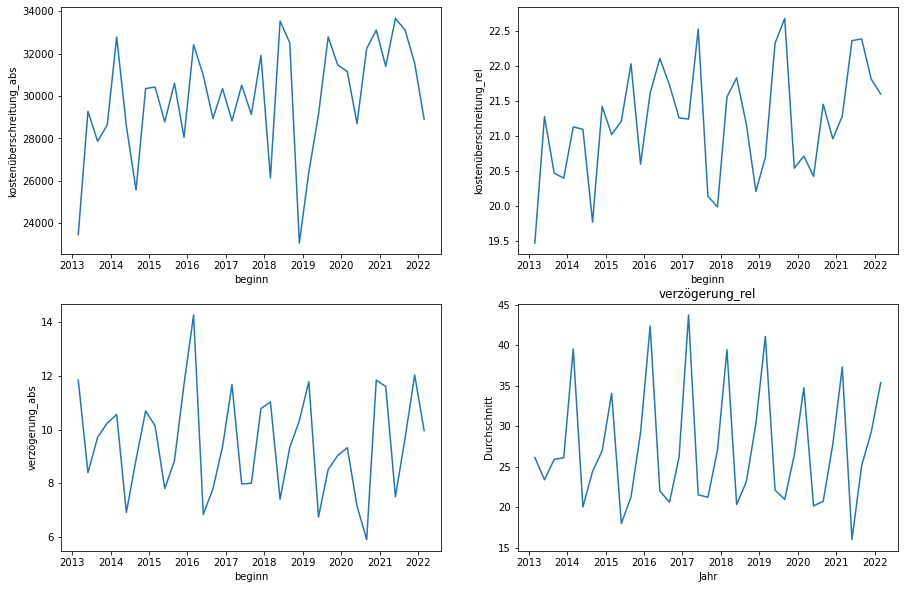

In [32]:
afig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

grp = df.groupby(pd.Grouper(key="beginn", freq="3m"))
my_lineplot(grp.agg({"kostenüberschreitung_abs": "mean"}),x


In [16]:
import seaborn as sns

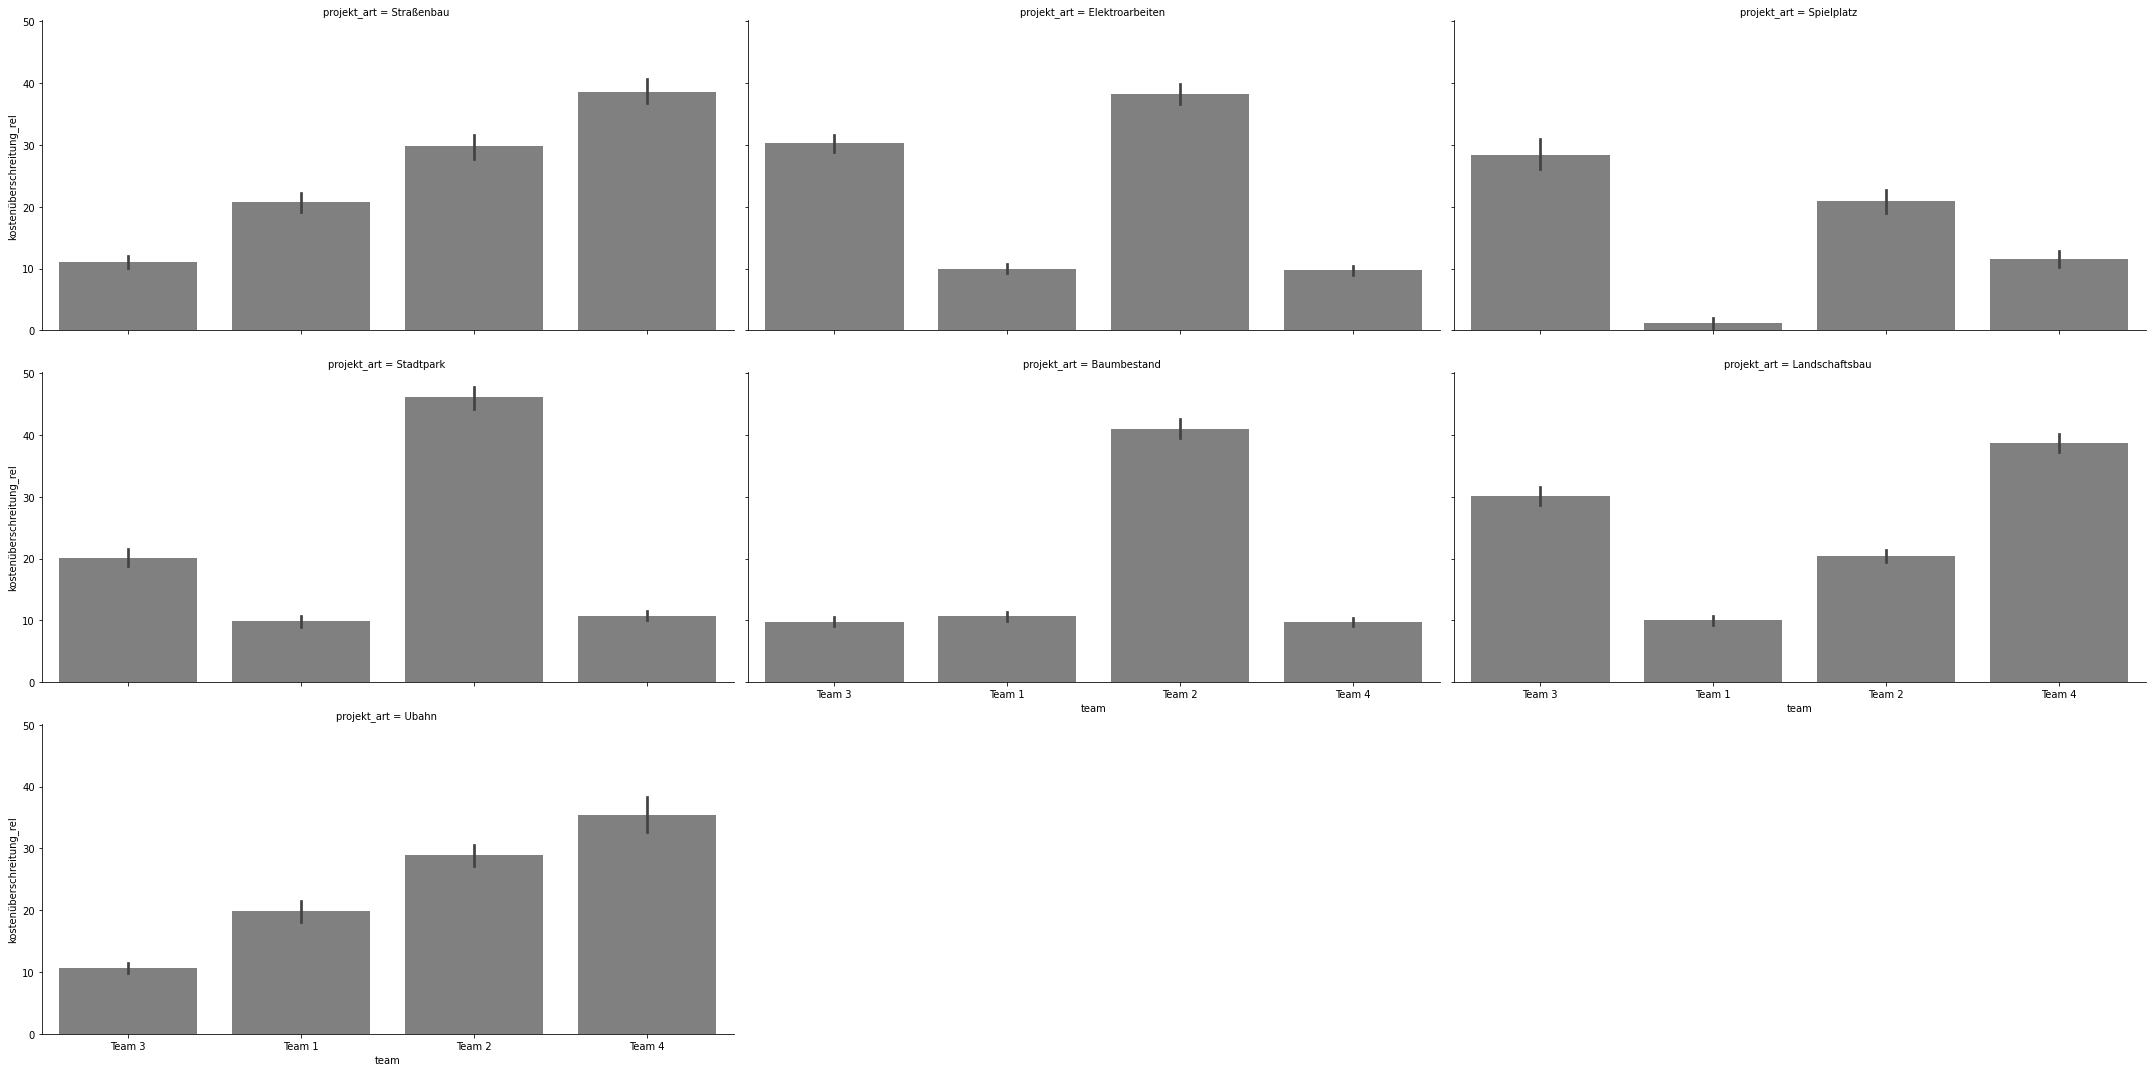

In [27]:
sns.catplot(x="team", y="kostenüberschreitung_rel", data=df, kind="bar", color="grey", col="projekt_art", col_wrap=3, height=5, aspect=2)